# CNN using Tensorflow
## To classify face_images: wearing_hat and not_wearing_hat
- Dataset: 1900 178px x 218px images (1000 - not_wearing_hat, 900 - wearing_hat)<br>
- Saved model file: hat_classifier_3.h5<br>
- Test accuracy: 94.4%<br>

### Imports, functions and constants

In [83]:
# Import libraries

import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, classification_report
import numpy as np
import matplotlib.pyplot as plt
import os
import pandas as pd

In [84]:
# Set random seed for reproducibility
random_seed = 100
tf.random.set_seed(random_seed)

In [85]:
# Define the custom preprocessing function to crop images to a square ratio
# Crop a square from the center of the image
def crop_to_square(image):
    width, height = image.shape[1], image.shape[0]
    new_width = new_height = min(width, height)
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    # Crop the array by selecting a subset of rows and columns
    image = image[int(top):int(bottom), int(left):int(right)]
    return image

def crop_to_square_for_img(image):
    width, height = image.size
    new_width = new_height = min(width, height)
    left = (width - new_width) / 2
    top = (height - new_height) / 2
    right = (width + new_width) / 2
    bottom = (height + new_height) / 2
    # Crop the image file
    image = image.crop((left, top, right, bottom))
    
    return image

In [86]:
image_size = (178, 218)
data_dir = 'data'

### Data loading and pre-processing

In [87]:
# Get the list of files and labels
file_paths = []
labels = []

for class_label in os.listdir(data_dir):
    # Skip if file is not a directory
    if not os.path.isdir(os.path.join(data_dir, class_label)):
        continue
    class_path = os.path.join(data_dir, class_label)
    
    # Add only jpg files
    class_files = [os.path.join(class_path, file) for file in os.listdir(class_path) if file.lower().endswith('.jpg')]
    
    # Set label based on class
    # if class_label == 'wearing_hat':
    #     class_label = 1
    # elif class_label == 'not_wearing_hat':
    #     class_label = 0
    # else:
    #     # Handle other classes if needed
    #     continue
    
    file_paths.extend(class_files)
    labels.extend([class_label] * len(class_files))

In [88]:
print(len(file_paths), len(labels))

1900 1900


In [89]:
print(labels[0:-5])

['wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_

### Data splitting

In [90]:
# Split the data into training, validation, and test sets
train_paths, test_paths, train_labels, test_labels = train_test_split(file_paths, labels, test_size=0.2, random_state=random_seed)
train_paths, val_paths, train_labels, val_labels = train_test_split(train_paths, train_labels, test_size=0.25, random_state=random_seed)

In [91]:
print(len(train_paths), len(train_labels))
print(len(val_paths), len(val_labels))

1140 1140
380 380


In [92]:
# Print 5 file paths and labels randomly
print(train_paths[0:5])
print(train_labels[0:5])

['data/wearing_hat/164920.jpg', 'data/not_wearing_hat/073500.jpg', 'data/not_wearing_hat/139299.jpg', 'data/not_wearing_hat/078763.jpg', 'data/not_wearing_hat/084431.jpg']
['wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat']


In [93]:
# Set up data generators
train_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_to_square)
val_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_to_square)
test_datagen = ImageDataGenerator(rescale=1./255, preprocessing_function=crop_to_square)

# Define batch size
batch_size = 32

In [94]:
train_labels = list(train_labels)

train_df = pd.DataFrame({'filename': train_paths, 'class': train_labels})
train_df['class'] = list(train_labels)
print(type(train_df['class']))

<class 'pandas.core.series.Series'>


In [95]:
# Training data generator
train_generator = train_datagen.flow_from_dataframe(pd.DataFrame({'filename': train_paths, 'class': train_labels}), 
                                                    target_size=(178, 178),
                                                    batch_size=batch_size, 
                                                    class_mode='binary',
                                                    seed=random_seed
                                                    )

# Validation data generator
val_generator = val_datagen.flow_from_dataframe(pd.DataFrame({'filename': val_paths, 'class': val_labels}), 
                                                target_size=(178, 178),
                                                batch_size=batch_size, 
                                                class_mode='binary',
                                                seed=random_seed
                                                )

# Test data generator
test_generator = test_datagen.flow_from_dataframe(pd.DataFrame({'filename': test_paths, 'class': test_labels}), 
                                                  target_size=(178, 178),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode=None,
                                                  seed=random_seed
                                                 )

Found 1140 validated image filenames belonging to 2 classes.
Found 380 validated image filenames belonging to 2 classes.
Found 380 validated image filenames.


In [96]:
print(train_generator.filenames)

['data/wearing_hat/164920.jpg', 'data/not_wearing_hat/073500.jpg', 'data/not_wearing_hat/139299.jpg', 'data/not_wearing_hat/078763.jpg', 'data/not_wearing_hat/084431.jpg', 'data/not_wearing_hat/157987.jpg', 'data/not_wearing_hat/103545.jpg', 'data/not_wearing_hat/195279.jpg', 'data/not_wearing_hat/074973.jpg', 'data/not_wearing_hat/167806.jpg', 'data/wearing_hat/179432.jpg', 'data/not_wearing_hat/180251.jpg', 'data/wearing_hat/124486.jpg', 'data/wearing_hat/201111.jpg', 'data/wearing_hat/039975.jpg', 'data/not_wearing_hat/192685.jpg', 'data/not_wearing_hat/102997.jpg', 'data/not_wearing_hat/077678.jpg', 'data/wearing_hat/003221.jpg', 'data/wearing_hat/167215.jpg', 'data/not_wearing_hat/138164.jpg', 'data/wearing_hat/164060.jpg', 'data/wearing_hat/129257.jpg', 'data/not_wearing_hat/084916.jpg', 'data/wearing_hat/160412.jpg', 'data/wearing_hat/023909.jpg', 'data/wearing_hat/137495.jpg', 'data/wearing_hat/054959.jpg', 'data/wearing_hat/097247.jpg', 'data/not_wearing_hat/198165.jpg', 'data

### CNN model for binary classification

In [97]:

# Define the CNN architecture
model = tf.keras.models.Sequential([
    tf.keras.layers.Conv2D(32, (3, 3), activation='relu', input_shape=(178, 178, 3)),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(64, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Conv2D(128, (3, 3), activation='relu'),
    tf.keras.layers.MaxPooling2D((2, 2)),
    tf.keras.layers.Dropout(0.25),
    tf.keras.layers.Flatten(),
    tf.keras.layers.Dense(128, activation='relu'),
    tf.keras.layers.Dropout(0.5),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Display the model summary
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_6 (Conv2D)           (None, 176, 176, 32)      896       
                                                                 
 max_pooling2d_6 (MaxPoolin  (None, 88, 88, 32)        0         
 g2D)                                                            
                                                                 
 dropout_8 (Dropout)         (None, 88, 88, 32)        0         
                                                                 
 conv2d_7 (Conv2D)           (None, 86, 86, 64)        18496     
                                                                 
 max_pooling2d_7 (MaxPoolin  (None, 43, 43, 64)        0         
 g2D)                                                            
                                                                 
 dropout_9 (Dropout)         (None, 43, 43, 64)       

In [98]:

# Train the model
history = model.fit(train_generator, epochs=10, validation_data=val_generator)

Epoch 1/10


2023-09-30 23:34:40.337007: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - ETA: 0s - loss: 0.9518 - accuracy: 0.6070

2023-09-30 23:34:49.229620: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


36/36 [==============================] - 11s 208ms/step - loss: 0.9518 - accuracy: 0.6070 - val_loss: 0.4997 - val_accuracy: 0.8132
Epoch 2/10
36/36 [==============================] - 2s 61ms/step - loss: 0.3067 - accuracy: 0.8895 - val_loss: 0.3125 - val_accuracy: 0.8579
Epoch 3/10
36/36 [==============================] - 2s 56ms/step - loss: 0.2034 - accuracy: 0.9246 - val_loss: 0.2188 - val_accuracy: 0.9211
Epoch 4/10
36/36 [==============================] - 2s 55ms/step - loss: 0.1477 - accuracy: 0.9509 - val_loss: 0.2181 - val_accuracy: 0.9105
Epoch 5/10
36/36 [==============================] - 2s 56ms/step - loss: 0.1304 - accuracy: 0.9588 - val_loss: 0.1973 - val_accuracy: 0.9342
Epoch 6/10
36/36 [==============================] - 2s 57ms/step - loss: 0.1238 - accuracy: 0.9632 - val_loss: 0.2371 - val_accuracy: 0.9158
Epoch 7/10
36/36 [==============================] - 2s 57ms/step - loss: 0.0940 - accuracy: 0.9614 - val_loss: 0.2051 - val_accuracy: 0.9316
Epoch 8/10
36/36 [====

### Visualising the datasets

In [99]:

true_labels = test_labels
print(true_labels)

['wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat'

In [100]:
# if true_labels == 'wearing_hat' then change it to 1
true_label_ints = [1 if x == 'wearing_hat' else 0 for x in true_labels]

print(true_label_ints)

[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 

In [101]:
print(test_generator.filenames)

['data/wearing_hat/154125.jpg', 'data/not_wearing_hat/015375.jpg', 'data/wearing_hat/149610.jpg', 'data/wearing_hat/018361.jpg', 'data/not_wearing_hat/058770.jpg', 'data/not_wearing_hat/076630.jpg', 'data/not_wearing_hat/023774.jpg', 'data/not_wearing_hat/098503.jpg', 'data/wearing_hat/055432.jpg', 'data/wearing_hat/093866.jpg', 'data/wearing_hat/041198.jpg', 'data/wearing_hat/099093.jpg', 'data/wearing_hat/078689.jpg', 'data/not_wearing_hat/136474.jpg', 'data/wearing_hat/194652.jpg', 'data/not_wearing_hat/053093.jpg', 'data/wearing_hat/173991.jpg', 'data/wearing_hat/076702.jpg', 'data/not_wearing_hat/064615.jpg', 'data/not_wearing_hat/127705.jpg', 'data/wearing_hat/180182.jpg', 'data/not_wearing_hat/117029.jpg', 'data/not_wearing_hat/135598.jpg', 'data/not_wearing_hat/085067.jpg', 'data/wearing_hat/141266.jpg', 'data/wearing_hat/136003.jpg', 'data/not_wearing_hat/079771.jpg', 'data/wearing_hat/133290.jpg', 'data/wearing_hat/035182.jpg', 'data/wearing_hat/009158.jpg', 'data/not_wearing

In [102]:
print(train_generator.classes)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 

In [103]:
test_generator.classes = true_label_ints
print(test_generator.classes)
print(test_generator.filenames)

[1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 0, 1, 1, 

In [104]:
test_generator.class_indices = {'not_wearing_hat': 0, 'wearing_hat': 1}

In [105]:
print(train_generator.classes)

[1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 0, 

### Model testing and predictions

In [106]:
# Evaluate the model on the test set
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

2023-09-30 23:35:10.333964: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 - 0s - loss: 0.0000e+00 - accuracy: 0.0000e+00 - 330ms/epoch - 28ms/step
Test Accuracy: 0.0


In [107]:
# Make predictions
predictions = model.predict(test_generator)
print(predictions)


2023-09-30 23:35:10.686699: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 [==============================] - 1s 43ms/step
[[1.00000000e+00]
 [9.99505877e-01]
 [1.00000000e+00]
 [9.99999642e-01]
 [1.34726032e-03]
 [5.96888312e-05]
 [3.25158387e-02]
 [8.88338021e-04]
 [1.00000000e+00]
 [9.99999523e-01]
 [9.99992371e-01]
 [9.99712288e-01]
 [9.99856710e-01]
 [1.04991477e-02]
 [1.00000000e+00]
 [8.21935236e-01]
 [1.00000000e+00]
 [9.99063551e-01]
 [1.31591468e-03]
 [4.09913296e-03]
 [1.00000000e+00]
 [8.06920946e-01]
 [2.33780798e-02]
 [8.37389007e-03]
 [9.99000847e-01]
 [9.98846650e-01]
 [3.77616321e-04]
 [9.99999523e-01]
 [1.00000000e+00]
 [9.99976873e-01]
 [8.24408889e-01]
 [5.98105544e-04]
 [5.05524734e-03]
 [9.99998927e-01]
 [1.00000000e+00]
 [1.00000000e+00]
 [6.32403826e-04]
 [9.99999523e-01]
 [1.89519264e-02]
 [1.00000000e+00]
 [4.33184057e-02]
 [9.99997258e-01]
 [1.00000000e+00]
 [7.81737734e-04]
 [9.99874592e-01]
 [1.55442674e-02]
 [7.05233309e-03]
 [1.00000000e+00]
 [9.99945641e-01]
 [9.32060415e-04]
 [4.90289778e-01]
 [6.43808320e-02]
 [3.097883

In [108]:
predicted_labels = np.round(predictions).flatten()  # Assuming a sigmoid activation in the output layer

In [109]:
print(true_labels)

['wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat'

In [110]:
print(predicted_labels)

[1. 1. 1. 1. 0. 0. 0. 0. 1. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 0. 0.
 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 1. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1.
 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 0. 0. 0. 0. 1. 1. 0. 0. 1. 0. 0. 1. 1. 1.
 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1. 1. 1. 0. 1. 1.
 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 0. 0. 0. 1. 1. 0. 0.
 1. 0. 0. 0. 1. 1. 0. 0. 1. 0. 1. 0. 1. 1. 0. 0. 1. 1. 1. 1. 0. 0. 0. 1.
 0. 1. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 0. 0.
 1. 0. 0. 0. 0. 0. 0. 0. 0. 1. 1. 0. 1. 0. 1. 0. 0. 1. 1. 1. 1. 0. 0. 1.
 0. 1. 0. 1. 0. 1. 0. 1. 1. 0. 1. 1. 1. 1. 0. 0. 1. 0. 1. 0. 0. 0. 1. 0.
 0. 0. 0. 1. 1. 0. 1. 1. 1. 1. 1. 1. 0. 1. 0. 1. 1. 1. 1. 0. 1. 1. 0. 0.
 0. 1. 0. 1. 0. 1. 0. 1. 0. 0. 1. 0. 1. 0. 0. 1. 0. 1. 1. 0. 1. 0. 1. 0.
 1. 0. 1. 1. 0. 0. 0. 1. 0. 1. 1. 0. 1. 0. 0. 1. 0. 0. 0. 0. 1. 1. 0. 1.
 0. 1. 0. 1. 1. 0. 1. 1. 1. 0. 0. 0. 0. 0. 1. 0. 1. 1. 1. 1. 1. 1. 0. 0.
 0. 0. 0. 0. 0. 0. 1. 0. 1. 0. 1. 1. 1. 1. 0. 0. 1.

In [111]:
predicted_labels = ['wearing_hat' if x == 1 else 'not_wearing_hat' for x in predicted_labels]

print(predicted_labels)

['wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'not_wearing_hat', 'wearing_hat', 'not_wearing_hat', 'wearing_hat', 'wearing_hat', 'not_wearing_hat', 'not_wearing_h

In [112]:
# Save the model
model.save('hat_classifier_3.h5')
# model.save('hat_classifier_2.keras')

/Users/sandulrenuja/miniconda3/envs/tf/lib/python3.10/site-packages/keras/src/engine/training.py:3000: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


### Visualizing the results

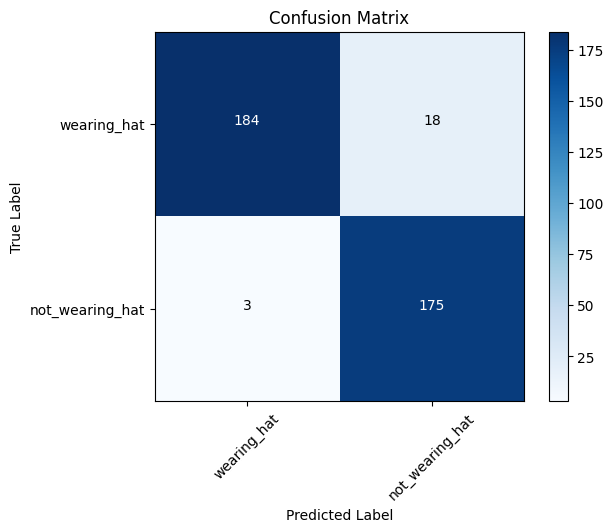

                 precision    recall  f1-score   support

not_wearing_hat       0.98      0.91      0.95       202
    wearing_hat       0.91      0.98      0.94       178

       accuracy                           0.94       380
      macro avg       0.95      0.95      0.94       380
   weighted avg       0.95      0.94      0.94       380



In [113]:
# Plot Confusion Matrix
cm = confusion_matrix(true_labels, predicted_labels)
# Define the class labels
class_labels = ["wearing_hat", "not_wearing_hat"]

# Plot the confusion matrix
plt.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()

# Set custom axis labels
tick_marks = range(len(class_labels))
plt.xticks(tick_marks, class_labels, rotation=45)
plt.yticks(tick_marks, class_labels)

thresh = cm.max() / 2.

for i in range(cm.shape[0]):
    for j in range(cm.shape[1]):
        plt.text(j, i, cm[i, j],
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.show()

# Print classification report
print(classification_report(true_labels, predicted_labels))

In [114]:
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


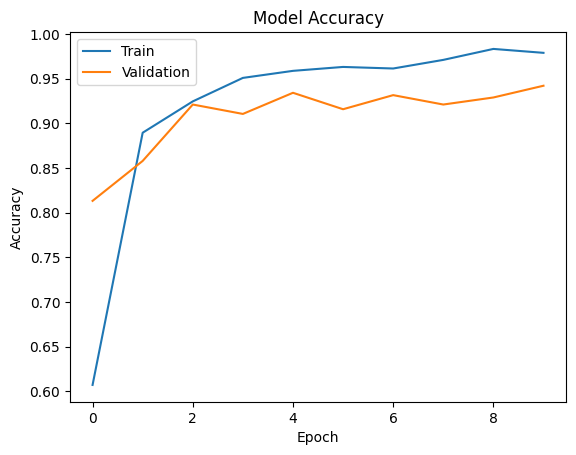

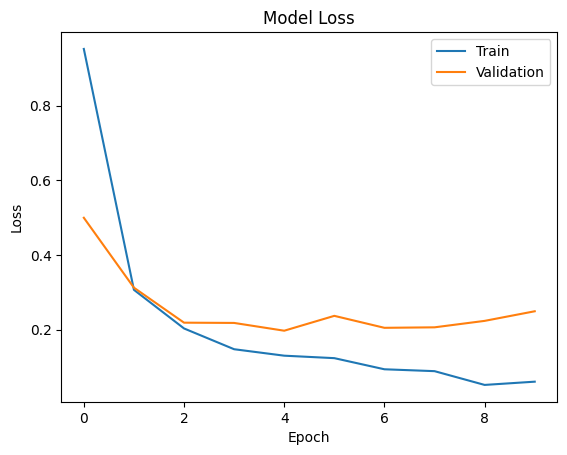

In [115]:

# Plot the training and validation accuracy
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()

# Plot the training and validation loss
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper right')
plt.show()

### Import saved model and test on real-world data

In [116]:
# Load model from keras file
model = tf.keras.models.load_model('hat_classifier_3.h5')
# model = tf.keras.models.load_model('hat_classifier_1.h5', compile=False)

# Compile the model with the Adam optimizer
# model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])


In [117]:
test_generator = test_datagen.flow_from_dataframe(pd.DataFrame({'filename': test_paths, 'class': test_labels}), 
                                                  target_size=(178, 178),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='binary'
                                                 )

Found 380 validated image filenames belonging to 2 classes.


In [118]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_accuracy}')


2023-09-30 23:35:12.536887: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


12/12 - 2s - loss: 0.2265 - accuracy: 0.9447 - 2s/epoch - 200ms/step
Test Accuracy: 0.9447368383407593


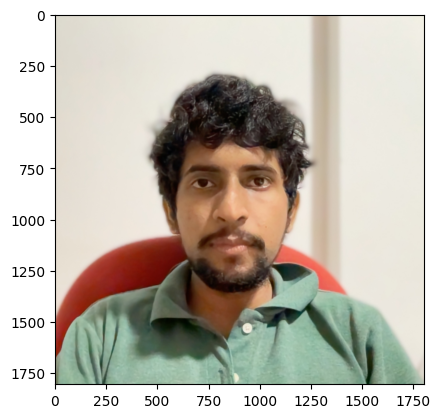

In [119]:
# Predict on a single image
# Load the image and resize it to the target size of 178 x 178 also crop it to a square
image = tf.keras.preprocessing.image.load_img('real_world/nocap-sr-2.jpeg')
image = crop_to_square_for_img(image)

# Show the image using matplotlib
plt.imshow(image)

In [120]:

# Resize the image to the target size of 178 x 178
image = image.resize((178, 178))

# Convert the image to a numpy array
input_arr = tf.keras.preprocessing.image.img_to_array(image)

# Add another dimension (since Keras expects a list of images)
input_arr = np.array([input_arr])

# Make predictions
predictions = model.predict(input_arr)
print(predictions)

if predictions[0][0] == 1.0 :
    print('The person is wearing a hat')
else:
    print('The person is not wearing a hat')

2023-09-30 23:35:15.310744: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:114] Plugin optimizer for device_type GPU is enabled.


1/1 [==============================] - 0s 329ms/step
[[1.]]
The person is wearing a hat


In [121]:
test_generator = test_datagen.flow_from_dataframe(pd.DataFrame({'filename': test_paths, 'class': test_labels}), 
                                                  target_size=(178, 178),
                                                  batch_size=batch_size,
                                                  shuffle=False,
                                                  class_mode='binary'
                                                 )

Found 380 validated image filenames belonging to 2 classes.


In [122]:
test_loss, test_accuracy = model.evaluate(test_generator, verbose=2)
print(f'Test Accuracy: {test_accuracy}')

12/12 - 0s - loss: 0.2265 - accuracy: 0.9447 - 345ms/epoch - 29ms/step
Test Accuracy: 0.9447368383407593
